In [110]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
current_directory = os.getcwd()
data_directory = os.path.join(current_directory, '..', 'raw_data')
data_directory = os.path.abspath(data_directory)
data_directory

'/Users/timjamboula/code/m-r-c-l/Movie-Recommendation-Engine/raw_data'

In [86]:
# Load each CSV file into a DataFrame
links_df = pd.read_csv(os.path.join(data_directory, 'ml-latest-small/links.csv'))
ratings_df = pd.read_csv(os.path.join(data_directory, 'ml-latest-small/ratings.csv'))
tags_df = pd.read_csv(os.path.join(data_directory, 'ml-latest-small/tags.csv'))
movies_df = pd.read_csv(os.path.join(data_directory, 'ml-latest-small/movies.csv'))

In [87]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [91]:
print(movies_df.isnull().sum())

movieId     0
title       0
genres      0
year       13
dtype: int64


## Data Cleaning

In [93]:
# Merging ratings with movies - use inner because multiple users rated the movies
ratings_movies_df = pd.merge(ratings_df, movies_df, on='movieId', how='inner')

# Merging ratings_movies with tags
ratings_movies_tags_df = pd.merge(ratings_movies_df, tags_df, on=['movieId', 'userId'], how='left')

# Merging ratings_movies_tags with links
data_df = pd.merge(ratings_movies_tags_df, links_df, on='movieId', how='left')
data_df

,userId,movieId,rating,timestamp_x,title,genres,year,tag,timestamp_y,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,NaN,NaN,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),"[Comedy, Romance]",1995,NaN,NaN,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),"[Action, Crime, Thriller]",1995,NaN,NaN,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",1995,NaN,NaN,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",1995,NaN,NaN,114814,629.0
...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split (2017),"[Drama, Horror, Thriller]",2017,NaN,NaN,4972582,381288.0
102673,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),"[Action, Crime, Thriller]",2017,Heroic Bloodshed,1.493844e+09,4425200,324552.0
102674,610,168250,5.0,1494273047,Get Out (2017),[Horror],2017,NaN,NaN,5052448,419430.0
102675,610,168252,5.0,1493846352,Logan (2017),"[Action, Sci-Fi]",2017,NaN,NaN,3315342,263115.0


In [94]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102677 entries, 0 to 102676
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       102677 non-null  int64  
 1   movieId      102677 non-null  int64  
 2   rating       102677 non-null  float64
 3   timestamp_x  102677 non-null  int64  
 4   title        102677 non-null  object 
 5   genres       102677 non-null  object 
 6   year         102657 non-null  object 
 7   tag          3476 non-null    object 
 8   timestamp_y  3476 non-null    float64
 9   imdbId       102677 non-null  int64  
 10  tmdbId       102664 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 8.6+ MB


In [95]:
# Filling missing values in 'tag' column with 'Unknown'
data_df['tag'] = data_df['tag'].fillna('Unknown')

In [88]:
# Extracting release year from title
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
movies_df['genres'] = movies_df['genres'].str.split('|')
movies_df['title'] = movies_df['title'].str.replace(r'\(\d{4}\)', '').str.strip()

In [96]:
import re

# Function to clean the title by removing the year and exclamation marks
def clean_title(title):
    # Removing year
    title = re.sub(r'\(\d{4}\)', '', title)
    # Removing parentheses
    title = title.replace('()', '')
    # Stripping any extra spaces
    return title.strip()

# Applying cleanig function to 'title' column
data_df['title'] = data_df['title'].apply(clean_title)
data_df

,userId,movieId,rating,timestamp_x,title,genres,year,tag,timestamp_y,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,Unknown,NaN,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men,"[Comedy, Romance]",1995,Unknown,NaN,113228,15602.0
2,1,6,4.0,964982224,Heat,"[Action, Crime, Thriller]",1995,Unknown,NaN,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en),"[Mystery, Thriller]",1995,Unknown,NaN,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995,Unknown,NaN,114814,629.0
...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,1493848402,Split,"[Drama, Horror, Thriller]",2017,Unknown,NaN,4972582,381288.0
102673,610,168248,5.0,1493850091,John Wick: Chapter Two,"[Action, Crime, Thriller]",2017,Heroic Bloodshed,1.493844e+09,4425200,324552.0
102674,610,168250,5.0,1494273047,Get Out,[Horror],2017,Unknown,NaN,5052448,419430.0
102675,610,168252,5.0,1493846352,Logan,"[Action, Sci-Fi]",2017,Unknown,NaN,3315342,263115.0


In [97]:
# Converting 'timestamp_x' column to actual dates
data_df['timestamp_x'] = pd.to_datetime(data_df['timestamp_x'], unit='s')
data_df.head()

,userId,movieId,rating,timestamp_x,title,genres,year,tag,timestamp_y,imdbId,tmdbId
0,1,1,4.0,2000-07-30 18:45:03,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,Unknown,NaN,114709,862.0
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men,"[Comedy, Romance]",1995,Unknown,NaN,113228,15602.0
2,1,6,4.0,2000-07-30 18:37:04,Heat,"[Action, Crime, Thriller]",1995,Unknown,NaN,113277,949.0
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en),"[Mystery, Thriller]",1995,Unknown,NaN,114369,807.0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995,Unknown,NaN,114814,629.0


In [98]:
# Dropping 'timestamp_y' - It is unnessecary
data_df = data_df.drop(columns=['timestamp_y'])
data_df.head()

,userId,movieId,rating,timestamp_x,title,genres,year,tag,imdbId,tmdbId
0,1,1,4.0,2000-07-30 18:45:03,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,Unknown,114709,862.0
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men,"[Comedy, Romance]",1995,Unknown,113228,15602.0
2,1,6,4.0,2000-07-30 18:37:04,Heat,"[Action, Crime, Thriller]",1995,Unknown,113277,949.0
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en),"[Mystery, Thriller]",1995,Unknown,114369,807.0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995,Unknown,114814,629.0


In [99]:
# Displaying rows where the 'year' column has missing (NaN) values
rows_with_missing_year = data_df[data_df['year'].isnull()]
rows_with_missing_year

,userId,movieId,rating,timestamp_x,title,genres,year,tag,imdbId,tmdbId
9455,62,176601,5.0,2018-05-08 16:00:52,Black Mirror,[(no genres listed)],NaN,Unknown,2492564,452830.0
17209,105,147250,5.0,2018-05-13 10:29:14,The Adventures of Sherlock Holmes and Doctor W...,[(no genres listed)],NaN,Unknown,229922,127605.0
17236,105,171749,5.0,2018-05-13 10:29:25,Death Note: Desu nôto (2006–2007),[(no genres listed)],NaN,Unknown,877057,419787.0
18202,111,171631,1.0,2018-01-31 23:21:49,Maria Bamford: Old Baby,[(no genres listed)],NaN,Unknown,6264596,455601.0
18204,111,171891,3.5,2018-01-31 23:09:59,Generation Iron 2,[(no genres listed)],NaN,Unknown,6263642,447818.0
30454,209,140956,3.5,2018-04-23 22:23:59,Ready Player One,"[Action, Sci-Fi, Thriller]",NaN,Unknown,1677720,333339.0
30505,210,40697,4.0,2018-05-25 16:36:31,Babylon 5,[Sci-Fi],NaN,Unknown,105946,NaN
47012,305,140956,4.5,2018-07-31 13:26:17,Ready Player One,"[Action, Sci-Fi, Thriller]",NaN,Unknown,1677720,333339.0
47130,306,149334,3.0,2018-02-11 20:19:32,Nocturnal Animals,"[Drama, Thriller]",NaN,Unknown,4550098,340666.0
50293,318,171495,5.0,2018-01-24 20:40:06,Cosmos,[(no genres listed)],NaN,Unknown,81846,409926.0


In [100]:
# Filling in missing ovie years - Dictionary with movieId as key and the correct year as value
year_updates = {
    176601: 2011, 147250: 1984, 171749: 2006, 171631: 2017, 171891: 2017, 140956: 2018, 40697: 1994, 149334: 2016,
    171495: 2016, 167570: 2016, 143410: 2015, 162414: 2016, 156605: 2016}

# Fill in missing years using
for movie_id, correct_year in year_updates.items():
    data_df.loc[data_df['movieId'] == movie_id, 'year'] = correct_year

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102677 entries, 0 to 102676
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   userId       102677 non-null  int64         
 1   movieId      102677 non-null  int64         
 2   rating       102677 non-null  float64       
 3   timestamp_x  102677 non-null  datetime64[ns]
 4   title        102677 non-null  object        
 5   genres       102677 non-null  object        
 6   year         102677 non-null  object        
 7   tag          102677 non-null  object        
 8   imdbId       102677 non-null  int64         
 9   tmdbId       102664 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.8+ MB


In [101]:
# 'year' column to integer
data_df['year'] = data_df['year'].astype(int)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102677 entries, 0 to 102676
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   userId       102677 non-null  int64         
 1   movieId      102677 non-null  int64         
 2   rating       102677 non-null  float64       
 3   timestamp_x  102677 non-null  datetime64[ns]
 4   title        102677 non-null  object        
 5   genres       102677 non-null  object        
 6   year         102677 non-null  int64         
 7   tag          102677 non-null  object        
 8   imdbId       102677 non-null  int64         
 9   tmdbId       102664 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 7.8+ MB


In [102]:
print(data_df.isnull().sum())

userId          0
movieId         0
rating          0
timestamp_x     0
title           0
genres          0
year            0
tag             0
imdbId          0
tmdbId         13
dtype: int64


In [103]:
# Count of total user ratings per movie - Grouping by 'movieId' 
ratings_count = data_df.groupby('movieId').size().reset_index(name='number_of_ratings')

# Merging the ratings count
data_df = pd.merge(data_df, ratings_count, on='movieId', how='left')
data_df

,userId,movieId,rating,timestamp_x,title,genres,year,tag,imdbId,tmdbId,number_of_ratings
0,1,1,4.0,2000-07-30 18:45:03,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,Unknown,114709,862.0,215
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men,"[Comedy, Romance]",1995,Unknown,113228,15602.0,53
2,1,6,4.0,2000-07-30 18:37:04,Heat,"[Action, Crime, Thriller]",1995,Unknown,113277,949.0,102
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en),"[Mystery, Thriller]",1995,Unknown,114369,807.0,204
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995,Unknown,114814,629.0,208
...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,2017-05-03 21:53:22,Split,"[Drama, Horror, Thriller]",2017,Unknown,4972582,381288.0,6
102673,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two,"[Action, Crime, Thriller]",2017,Heroic Bloodshed,4425200,324552.0,13
102674,610,168250,5.0,2017-05-08 19:50:47,Get Out,[Horror],2017,Unknown,5052448,419430.0,15
102675,610,168252,5.0,2017-05-03 21:19:12,Logan,"[Action, Sci-Fi]",2017,Unknown,3315342,263115.0,29


In [104]:
# Calculate the mean (average) rating for each movie - Group by 'movieId'
average_ratings = data_df.groupby('movieId')['rating'].mean().round(1).reset_index(name='average_rating')

# Merge the average rating back into the original dataframe
data_df = pd.merge(data_df, average_ratings, on='movieId', how='left')
data_df

,userId,movieId,rating,timestamp_x,title,genres,year,tag,imdbId,tmdbId,number_of_ratings,average_rating
0,1,1,4.0,2000-07-30 18:45:03,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,Unknown,114709,862.0,215,3.9
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men,"[Comedy, Romance]",1995,Unknown,113228,15602.0,53,3.2
2,1,6,4.0,2000-07-30 18:37:04,Heat,"[Action, Crime, Thriller]",1995,Unknown,113277,949.0,102,3.9
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en),"[Mystery, Thriller]",1995,Unknown,114369,807.0,204,4.0
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995,Unknown,114814,629.0,208,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...
102672,610,166534,4.0,2017-05-03 21:53:22,Split,"[Drama, Horror, Thriller]",2017,Unknown,4972582,381288.0,6,3.3
102673,610,168248,5.0,2017-05-03 22:21:31,John Wick: Chapter Two,"[Action, Crime, Thriller]",2017,Heroic Bloodshed,4425200,324552.0,13,4.3
102674,610,168250,5.0,2017-05-08 19:50:47,Get Out,[Horror],2017,Unknown,5052448,419430.0,15,3.6
102675,610,168252,5.0,2017-05-03 21:19:12,Logan,"[Action, Sci-Fi]",2017,Unknown,3315342,263115.0,29,4.2


In [106]:
# Renaming columns
data_df = data_df.rename(columns={'timestamp_x': 'timestamp'})

#Drop TMBD
data_df = data_df.dropna(axis=1)
data_df_coldrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102677 entries, 0 to 102676
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   userId             102677 non-null  int64         
 1   movieId            102677 non-null  int64         
 2   rating             102677 non-null  float64       
 3   timestamp          102677 non-null  datetime64[ns]
 4   title              102677 non-null  object        
 5   genres             102677 non-null  object        
 6   year               102677 non-null  int64         
 7   tag                102677 non-null  object        
 8   imdbId             102677 non-null  int64         
 9   number_of_ratings  102677 non-null  int64         
 10  average_rating     102677 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 8.6+ MB


## Plotting

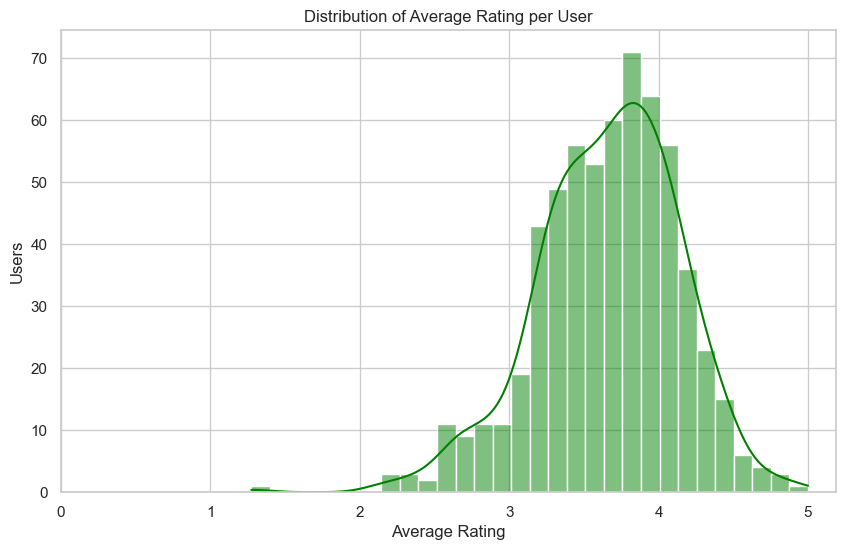

In [165]:
# Average Rating User Has Given to Movies
average_rating_user = data_df.groupby('userId')['rating'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(average_rating_user, bins=30, kde=True, color='green')
plt.title('Distribution of Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Users')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

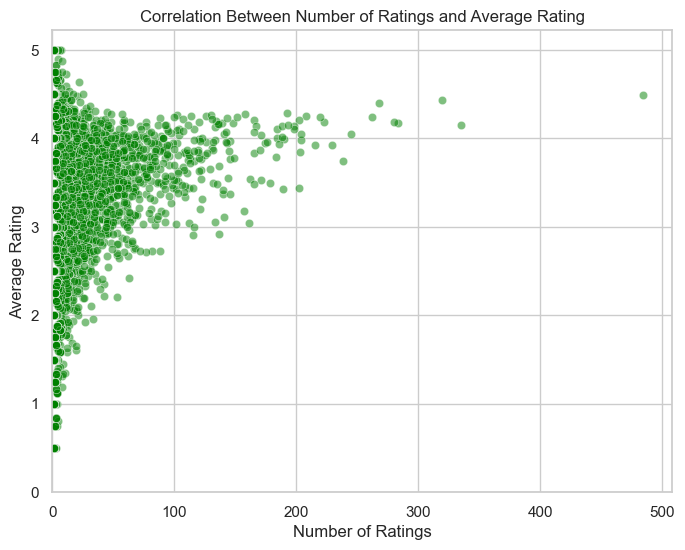

In [164]:
# Correlation Between Number of Ratings and Average Rating. Exploring whether movies with more ratings tend to 
# have higher or lower average ratings.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=ratings_per_movie, y=average_rating_per_movie, alpha=0.5, color='green')
plt.title('Correlation Between Number of Ratings and Average Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

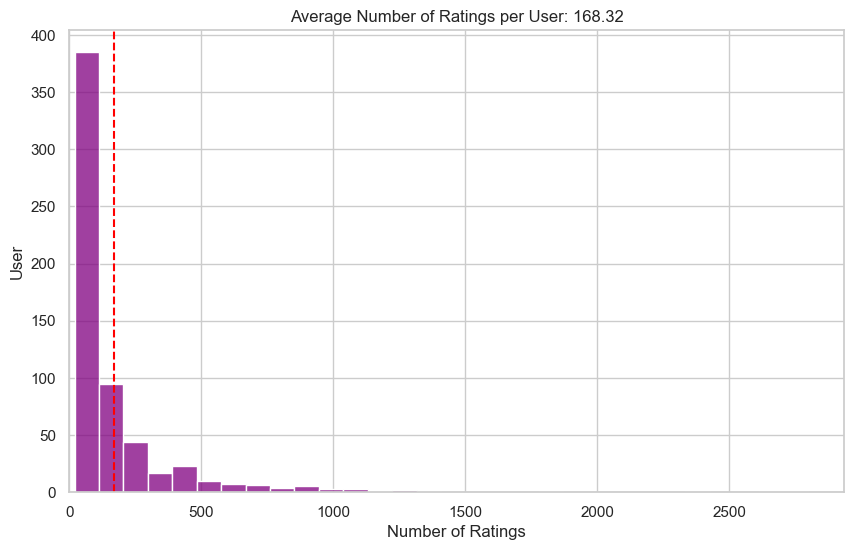

In [162]:
# Average number of ratings per user
ratings_per_user = data_df.groupby('userId')['rating'].count()
average_ratings_per_user = ratings_per_user.mean()

plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=30, color='purple')
plt.axvline(average_ratings_per_user, color='red', linestyle='--')
plt.title(f'Average Number of Ratings per User: {average_ratings_per_user:.2f}')
plt.xlabel('Number of Ratings')
plt.ylabel('User')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

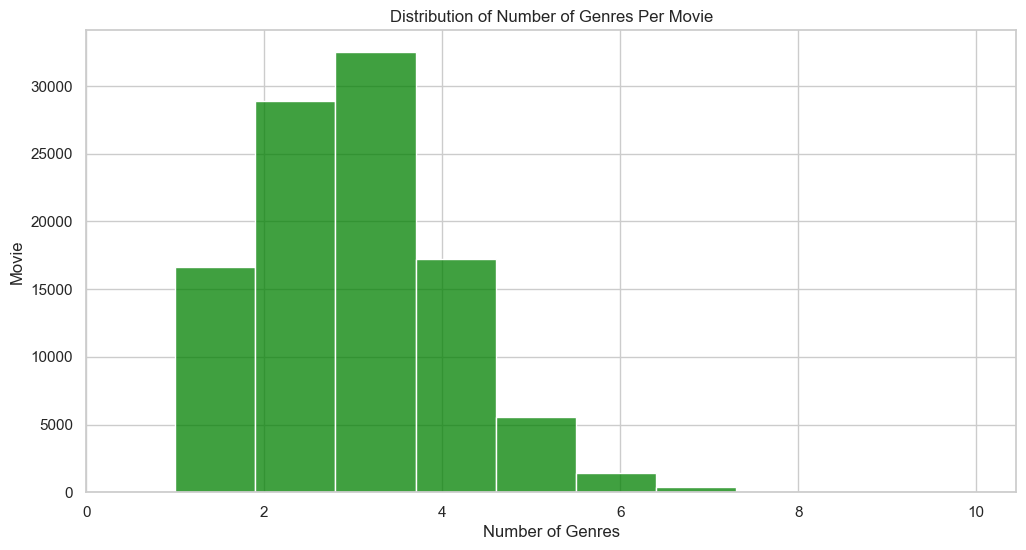

In [160]:
# Multiple Genres per Movie
data_df['num_genres'] = data_df['genres'].apply(lambda x: len(eval('x')))

plt.figure(figsize=(12, 6))
sns.histplot(data_df['num_genres'], bins=10, color='green')
plt.title('Distribution of Number of Genres Per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Movie')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_54204/1697280706.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genres', y='rating', data=genre_ratings, palette='viridis')


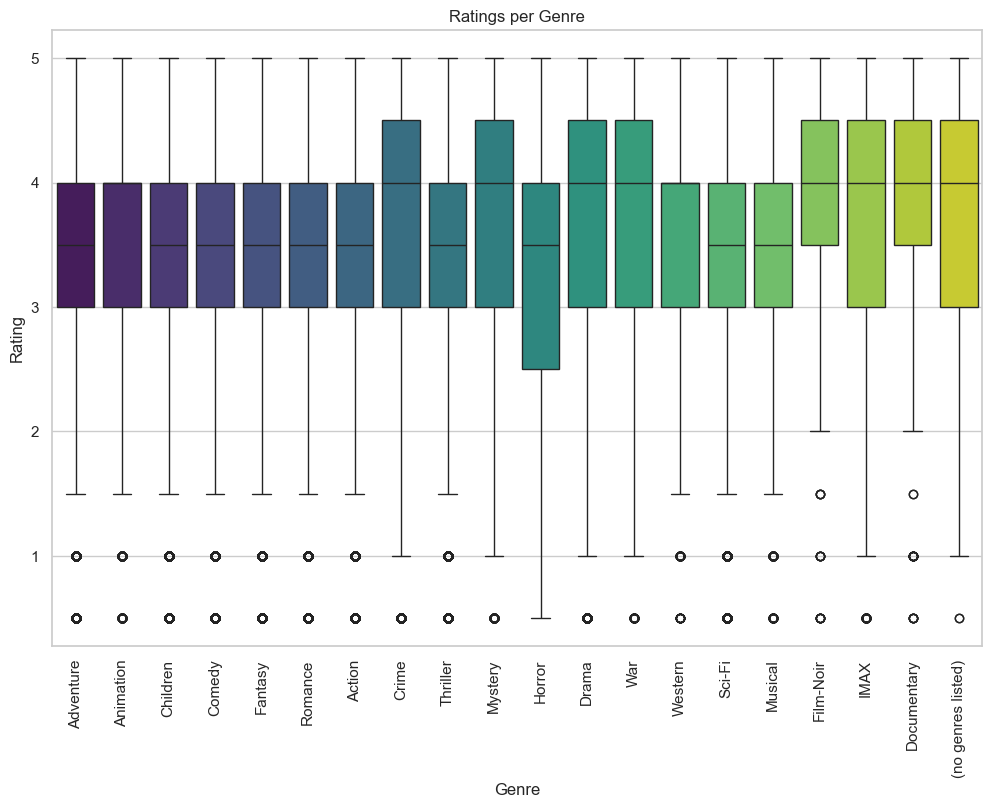

In [144]:
# Ratings per Genre: Distribution of ratings across different genres
genre_ratings = data_df.copy()
genre_ratings['genres'] = genre_ratings['genres'].apply(lambda x: eval('x'))
genre_ratings = genre_ratings.explode('genres')

plt.figure(figsize=(12, 8))
sns.boxplot(x='genres', y='rating', data=genre_ratings, palette='viridis')
plt.title('Ratings per Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

In [184]:
# Splitting genres
genre_ratings = data_df.copy()
genre_ratings['genres'] = genre_ratings['genres'].apply(lambda x: eval('x'))
genre_ratings = genre_ratings.explode('genres')

# Calculating the average rating per genre
avg_rat_genre = genre_ratings.groupby('genres')['rating'].mean().reset_index()
avg_rat_genre.columns = ['genre', 'avg_rat_genre']
avg_rat_genre['avg_rat_genre'] = avg_rat_genre['avg_rat_genre'].round(2)

# Counting the number of movies per genre
movies_per_genre = genre_ratings.groupby('genres')['movieId'].nunique().reset_index()
movies_per_genre.columns = ['genre', 'num_movies_per_genre']

# Counting the number of users per genre
users_per_genre = genre_ratings.groupby('genres')['userId'].nunique().reset_index()
users_per_genre.columns = ['genre', 'num_users_per_genre']

# Merging into one DataFrame
genre_analysis = pd.merge(avg_rat_genre, movies_per_genre, on='genre')
genre_analysis = pd.merge(genre_analysis, users_per_genre, on='genre')

# Calculating the percentage of movies per genre
total_movies = genre_ratings['movieId'].nunique()
genre_analysis['%_total_movies'] = (genre_analysis['num_movies_per_genre'] / total_movies * 100).round(1)
genre_analysis

,genre,avg_rat_genre,num_movies_per_genre,num_users_per_genre,%_total_movies
0,(no genres listed),3.53,34,26,0.3
1,Action,3.46,1828,608,18.8
2,Adventure,3.52,1262,606,13.0
3,Animation,3.64,610,527,6.3
4,Children,3.42,664,559,6.8
5,Comedy,3.40,3753,609,38.6
6,Crime,3.69,1196,603,12.3
7,Documentary,3.81,438,223,4.5
8,Drama,3.67,4349,610,44.7
9,Fantasy,3.50,778,583,8.0


/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_54204/697638494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rat_genre', y='genre', data=genre_analysis, palette='Blues_d')


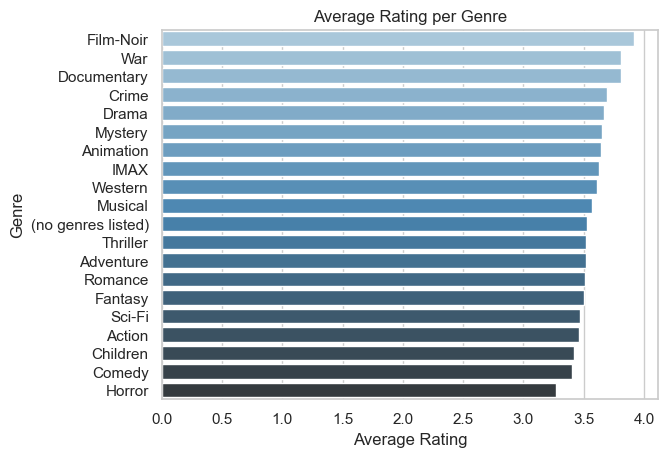

In [154]:
# Average Rating per Genre
sns.barplot(x='avg_rat_genre', y='genre', data=genre_analysis, palette='Blues_d')
plt.title('Average Rating per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre');

/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_54204/3404618927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_movies_per_genre', y='genre', data=genre_analysis, palette='Greens_d')


Text(0, 0.5, 'Genre')

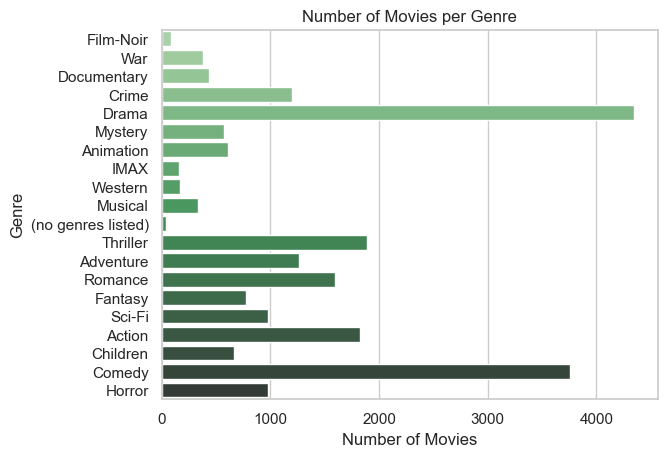

In [155]:
# Number of Movies per Genre
sns.barplot(x='num_movies_per_genre', y='genre', data=genre_analysis, palette='Greens_d')
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

/var/folders/h2/7np79zrx3xj5tj51tm9hq1zw0000gn/T/ipykernel_54204/4179274834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_users_per_genre', y='genre', data=genre_analysis, palette='Oranges_d')


Text(0, 0.5, 'Genre')

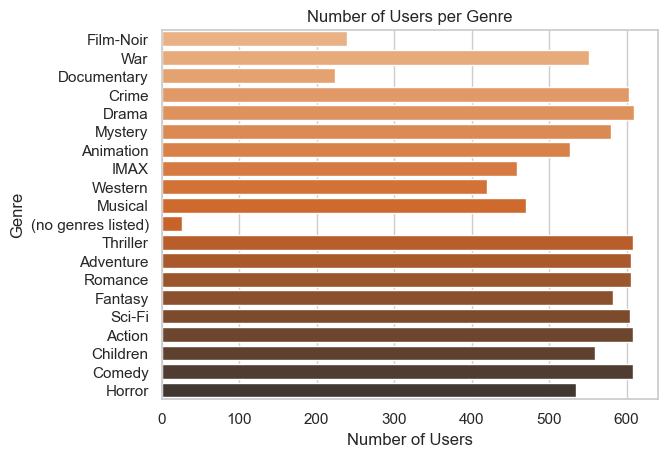

In [156]:
# Number of Users per Genre
sns.barplot(x='num_users_per_genre', y='genre', data=genre_analysis, palette='Oranges_d')
plt.title('Number of Users per Genre')
plt.xlabel('Number of Users')
plt.ylabel('Genre')

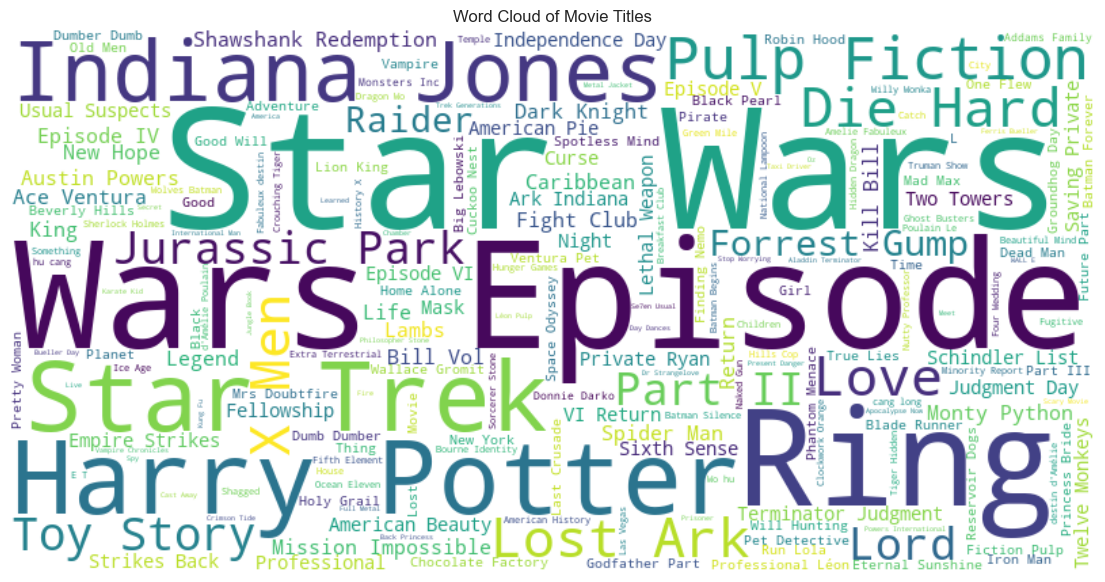

In [173]:
from wordcloud import WordCloud

# Word cloud for movie titles
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data_df['title']))

plt.figure(figsize=(14, 8))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Titles')
plt.axis('off')
plt.show()

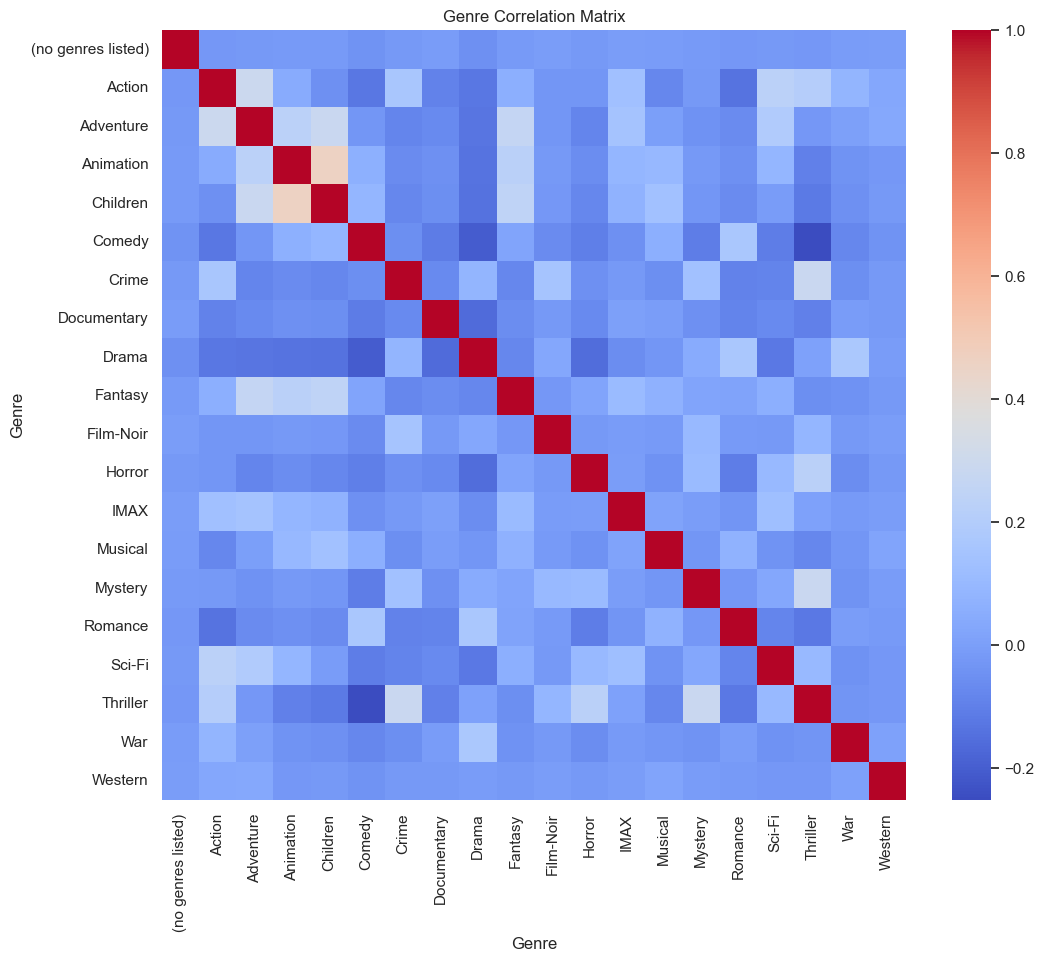

In [176]:
# Genre-movie matrix - Correlations between genres: For example, are users who like “Action” movies also likely 
# to enjoy “Adventure” or “Thriller” genres? Helpful in making cross-genre recommendations?
genre_movie_matrix = genre_ratings.pivot_table(index='movieId', columns='genres', values='rating', aggfunc='mean').fillna(0)

# Calculating correlation between genres
genre_correlation = genre_movie_matrix.corr()

# Plotting correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(genre_correlation, cmap='coolwarm', cbar=True)
plt.title('Genre Correlation Matrix')
plt.xlabel('Genre')
plt.ylabel('Genre')
plt.show()

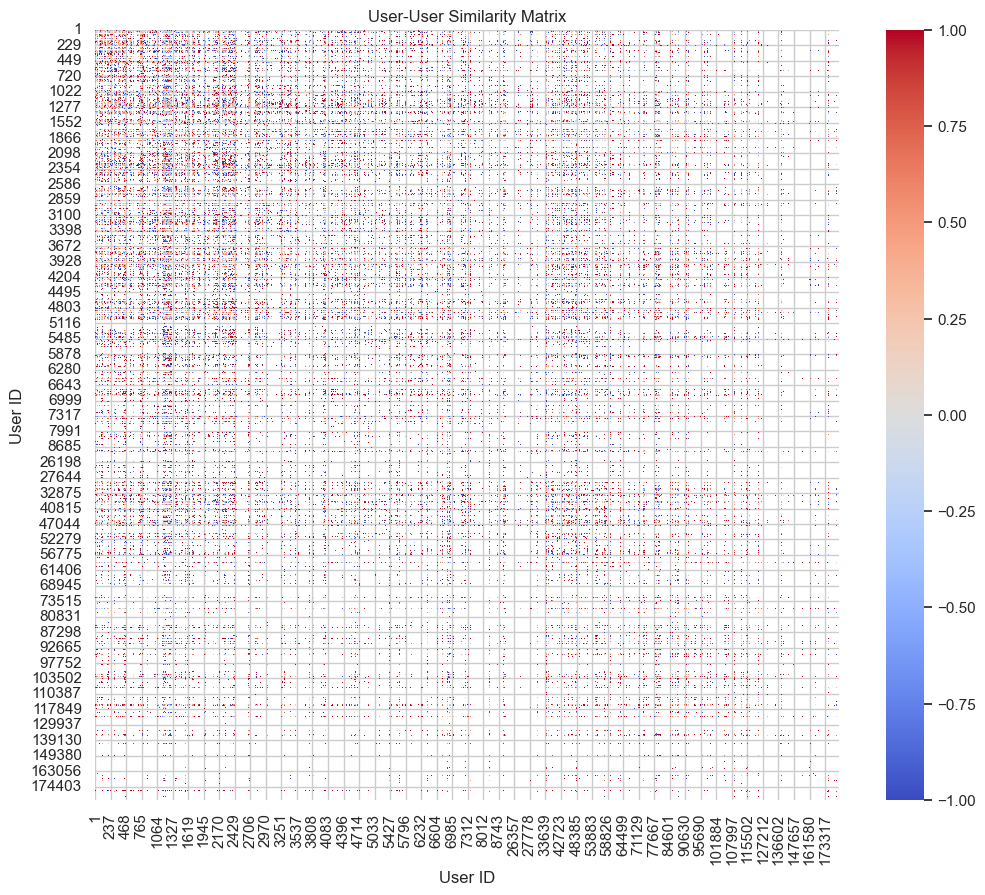

In [168]:
# User-movie rating matrix: Calculate the similarity between users based on their rating patterns. 
# Useful for collaborative filtering-based recommendation systems.
user_movie_matrix = data_df.pivot_table(index='userId', columns='movieId', values='rating')

# Pearson correlation between users
user_similarity = user_movie_matrix.corr(method='pearson')

# Plotting similarity matrix
plt.figure(figsize=(12, 10))
sns.heatmap(user_similarity, cmap='coolwarm', cbar=True)
plt.title('User-User Similarity Matrix')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()

- collaborative: users with similar genre preferences can be grouped together,  
- content-based filtering: recommendations are made based on the user’s historical ratings within certain genres